# Visão Computacional com Aprendizado Profundo

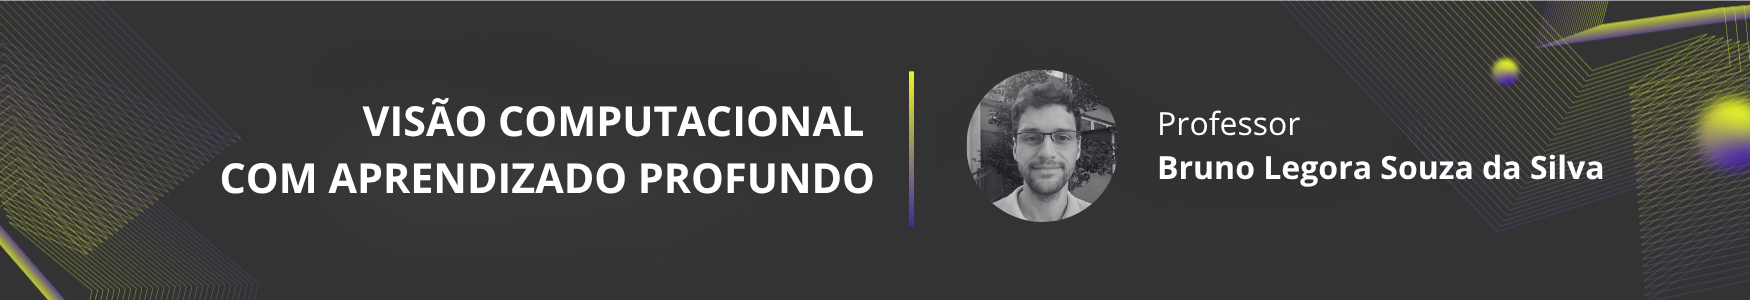

# Laboratório 5 - Introdução ao Aprendizado Profundo

Neste laboratório, vamos tentar classificar imagens de rostos usando diferentes redes neurais - de "rasas" até as "profundas".

Para isso, usaremos a biblioteca scikit-learn com a classe [``MLPClassifier``](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html), também usada pelo prof. Giovanni na disciplina de Redes Neurais Artificiais.

Iniciamos importanto as bibliotecas necessárias para rodar nosso laboratório.



In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from sklearn.datasets import fetch_olivetti_faces
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

Agora dividimos os dados em treino e teste, da mesma forma que fizemos antes:

In [ ]:
faces = fetch_olivetti_faces()
images = faces.images
targets = faces.target # targets
test_images_idx = [  7,  8,  9, 17, 18, 19, 27, 28, 29, 37, 38, 39,\
                    47, 48, 49, 57, 58, 59, 67, 68, 69, 77, 78, 79,\
                    87, 88, 89, 97, 98, 99,107,108,109,117,118,119,\
                   127,128,129,137,138,139,147,148,149,157,158,159,\
                   167,168,169,177,178,179,187,188,189,197,198,199,\
                   207,208,209,217,218,219,227,228,229,237,238,239,\
                   247,248,249,257,258,259,267,268,269,277,278,279,\
                   287,288,289,297,298,299,307,308,309,317,318,319,\
                   327,328,329,337,338,339,347,348,349,357,358,359,\
                   367,368,369,377,378,379,387,388,389,397,398,399]

train_images_idx = list(range(len(images)))

for idx in range(len(test_images_idx)-1,-1,-1):
  train_images_idx.pop(test_images_idx[idx])

train_images = images[train_images_idx]
train_targets = targets[train_images_idx]
test_images = images[test_images_idx]
test_targets = targets[test_images_idx]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


Lembrando que a ideia do Deep Learning é usar a própria imagem na rede neural, ao invés de descritores.

Do slide: "Em geral, essa representação hierárquica dos dados nos dispensa de utilizar descritores/extratores de características “manuais”, como o LBP ou HOG."

Iremos, então, usar os algoritmos a mesma MLP usada na disciplina de RNA, mas agora usando as próprias imagens como dados de entrada. O objetivo ainda é classificar corretamente os rostos das pessoas!


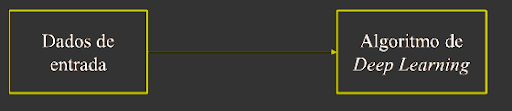

Vamos montar a nossa rede neural, começando por uma rede neural "rasa" - com apenas 3 camadas - entrada, oculta e saída.

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, alpha=0.0001,  \
                    solver='sgd', verbose=False,  random_state=21, tol=0.0001)


A rede neural MLP trabalha com dados "vetorizados", e imagens são dados "matriciais". Precisamos alterar a forma, nesse caso.

A opção mais simples é "achatar" a imagem, concatenando todas as linhas uma ao lado da outra. Ex:

$  \begin{bmatrix}
1 & 2  & 3 \\
4 & 5 &  6\\
7 & 8 &  9\\
\end{bmatrix} \rightarrow \begin{bmatrix} 1 & 2 & 3 & 4 & 5 &6 & 7 & 8 & 9\end{bmatrix} $

Para fazer essa operação, vamos usar a função flatten() do numpy:

In [ ]:
print(train_images.shape)
train_images_flattened = [x.flatten() for x in train_images]
train_images_flattened = np.asarray(train_images_flattened)
print(train_images_flattened.shape)

(280, 64, 64)
(280, 4096)


Agora nossas imagens 64x64 são vetores de 4096 "características"!

Vamos treinar nossa rede neural "rasa" com esses dados.

Observação: Nossos targets eram um vetor de números de 1 a 40. Agora, vamos convertê-lo usando um OneHotEncoder para gerar uma matriz "indicadora" de classe - a classe da linha i é representada por um número 1 na coluna j.

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(train_targets.reshape((-1,1)))
train_targets_onehot = enc.transform(train_targets.reshape((-1,1))).toarray()
clf.fit(train_images_flattened,train_targets_onehot)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=500, random_state=21, solver='sgd')

Após o treinamento, vamos calcular as métricas:

In [ ]:
test_images_flattened = [x.flatten() for x in test_images]
test_images_flattened = np.asarray(test_images_flattened)
test_targets_onehot = enc.transform(test_targets.reshape((-1,1))).toarray()


predicted_class_onehot = clf.predict(test_images_flattened)

accuracy = accuracy_score(test_targets_onehot, predicted_class_onehot)
print("Acurácia do modelo: %.1f%%" % (accuracy*100))


Acurácia do modelo: 24.2%


Pudemos ver que, ao usar uma rede neural com apenas uma camada oculta, nossa acurácia foi de 24.2%. Vamos tentar com outras redes!

Agora, 2 camadas ocultas:

In [ ]:
clf2 = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=500, alpha=0.0001,  \
                    solver='sgd', verbose=False,  random_state=21, tol=0.0001)
clf2.fit(train_images_flattened,train_targets_onehot)
predicted_class_onehot = clf2.predict(test_images_flattened)

accuracy = accuracy_score(test_targets_onehot, predicted_class_onehot)
print("Acurácia do modelo: %.1f%%" % (accuracy*100))

Acurácia do modelo: 27.5%


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


A acurácia melhorou um pouco! Agora, temos 27,5%... Ainda é bem ruim perto da estratégia que vimos/fizemos no EA2...

Repare que demorou um pouco mais para treinar a rede neural.

Vamos aumentar a profundidade! Agora, com 3 camadas:

In [ ]:
clf3 = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,  \
                    solver='sgd', verbose=False,  random_state=21, tol=0.0001)
clf3.fit(train_images_flattened,train_targets_onehot)
predicted_class_onehot = clf3.predict(test_images_flattened)

accuracy = accuracy_score(test_targets_onehot, predicted_class_onehot)
print("Acurácia do modelo: %.1f%%" % (accuracy*100))

Acurácia do modelo: 13.3%


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


A acurácia ... piorou!? Agora, temos 13,3%... O que pode ter acontecido?!

Repare que demorou um pouco mais para treinar a rede neural.

Vamos aumentar o tamanho de cada camada! Agora, com 3 camadas maiores, com 500 neurônios cada:

In [ ]:
clf4 = MLPClassifier(hidden_layer_sizes=(500,500,500), max_iter=500, alpha=0.0001,  \
                    solver='sgd', verbose=False,  random_state=21, tol=0.0001)
clf4.fit(train_images_flattened,train_targets_onehot)
predicted_class_onehot = clf4.predict(test_images_flattened)

accuracy = accuracy_score(test_targets_onehot, predicted_class_onehot)
print("Acurácia do modelo: %.1f%%" % (accuracy*100))

Acurácia do modelo: 40.0%


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Opa! Obtivemos uma acurácia bem maior que os demais testes... Porém, ainda nos 40%, o que é muito abaixo do obtido no EA2...

Repare que demorou BEM mais para treinar a rede neural (cerca de 1 minuto).

Vamos aumentar a profundidade! Agora, com 4 camadas maiores, com 500 neurônios cada:

In [ ]:
clf5 = MLPClassifier(hidden_layer_sizes=(500,500,500,500), max_iter=500, alpha=0.0001,  \
                    solver='sgd', verbose=False,  random_state=21, tol=0.0001)
clf5.fit(train_images_flattened,train_targets_onehot)
predicted_class_onehot = clf5.predict(test_images_flattened)

accuracy = accuracy_score(test_targets_onehot, predicted_class_onehot)
print("Acurácia do modelo: %.1f%%" % (accuracy*100))

Acurácia do modelo: 46.7%


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Opa! Obtivemos mais uma melhora em relação demais testes... Porém, ainda nos 46%, o que é muito abaixo do obtido no EA2... Será que se aumentarmos a profundidade e o tamanho das camadas, o resultado melhora? Se sim, esse tal de aprendizado profundo promete ser bom!

Repare que demorou BEM mais para treinar a rede neural (cerca de 2 minutos).

Vamos aumentar a profundidade! Agora, com 5 camadas ainda maiores, com 1000 neurônios cada:

In [ ]:
clf6 = MLPClassifier(hidden_layer_sizes=(1000,1000,1000,1000,1000), max_iter=500, alpha=0.0001,  \
                    solver='sgd', verbose=False,  random_state=21, tol=0.0001)
clf6.fit(train_images_flattened,train_targets_onehot)
predicted_class_onehot = clf6.predict(test_images_flattened)

accuracy = accuracy_score(test_targets_onehot, predicted_class_onehot)
print("Acurácia do modelo: %.1f%%" % (accuracy*100))

Acurácia do modelo: 58.3%


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Opa! Obtivemos mais uma melhora em relação demais testes... Porém, ainda nos 58%, o que é muito abaixo do obtido no EA2... Será que se aumentarmos a profundidade, o resultado melhora? Se sim, esse tal de aprendizado profundo promete ser bom!

Repare que demorou BEM mais para treinar a rede neural (cerca de 4 a 5 minutos).

Vamos aumentar a profundidade! Agora, com 10 camadas ainda maiores, com 1000 neurônios cada:

In [ ]:
clf7 = MLPClassifier(hidden_layer_sizes=(1000,1000,1000,1000,1000,1000,1000,1000,1000,1000), max_iter=500, alpha=0.0001,  \
                    solver='sgd', verbose=False,  random_state=21, tol=0.0001)
clf7.fit(train_images_flattened,train_targets_onehot)
predicted_class_onehot = clf7.predict(test_images_flattened)

accuracy = accuracy_score(test_targets_onehot, predicted_class_onehot)
print("Acurácia do modelo: %.1f%%" % (accuracy*100))

Acurácia do modelo: 0.0%


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Com 10 camadas, o resultado foi pra 0%??? O que será que houve?

Repare que demorou BEM mais para treinar a rede neural (cerca de 6 a 7 minutos).

O que será que aconteceu?

Vamos analisar o tamanho das 7 redes que estudamos... Vale ressaltar que todas as redes possuem camada de entrada com 4096 neurônios (cada imagem vetorizada tem 4096 "características") e 40 saídas (40 classes em one-hot-encoding).

A rede 1 possui 1 camada oculta com 100 neurônios:

$4096*100 + 100*40 \approx 413$ mil parâmetros

A rede 2 possui 2 camadas ocultas com 100 neurônios:

$4096*100 + 100*100 + 100*40 \approx 423$ mil parâmetros

A rede 3 possui 3 camadas ocultas com 100 neurônios:

$4096*100 + 100*100 + 100*100 + 100*40 \approx 433$ mil parâmetros

As 3 redes anteriores tiveram acurácia abaixo dos 30%. Conseguimos aumentar um pouco (para $\approx 40\%$) com a rede 4.

A rede 4 possui 3 camadas ocultas com 500 neurônios:

$4096*500 + 500*500 + 500*500 + 500*40 \approx 2.5$ milhões de parâmetros

Reparem que a rede está muito maior (em número de parâmetros).

A rede 5 possui 4 camadas ocultas com 500 neurônios, obtendo 46% de acurácia:

$4096*500 + 500*500 + 500*500 + 500*500 + 500*40 \approx 2.8$ milhões de parâmetros

Já na rede 6, demos um grande salto. Agora, temos 5 camadas com 1000 neurônios. A acurácia, nesse caso, aumentou para 58%, mas a rede está muito maior:

$4096*1000 + 1000*1000 + 1000*1000 + 1000*1000 + 1000*1000 + 1000*40 \approx 8.1~\text{milhões de parâmetros}$

Até esse ponto, vimos que quanto maior a rede, maior o número de parâmetros, maior é o tempo de treinamento, e maior é a acurácia. Em seguida, fizemos um teste com uma rede maior: 10 camadas com 1000 neurônios:

$4096*1000 + 1000*1000 + 1000*1000 + 1000*1000 + 1000*1000 + 1000*1000 + 1000*1000 + 1000*1000 + 1000*1000+ 1000*1000+ 1000*40 \approx 13.1~\text{milhões de parâmetros}$.

Essa rede é maior, possui mais parâmetros, mas o algoritmo de treinamento não foi capaz de treinar a rede para que ela acertasse ao menos uma amostra dos casos de teste, obtendo acurácia de 0%.

Treinar uma rede neural, como vocês já devem ter percebido, não é uma tarefa tão trivial. Quanto maior o modelo, a tendência é que mais dados precisam ser usados para que esse modelo passe por um bom treinamento. No nosso caso, não tinhamos muitas imagens - apenas 280 para treinar uma rede com milhões de parâmetros. O algoritmo de treinamento demora muito para convergir, e a rede acaba não sendo muito bem treinada dentro dos limites definidos.

Nos próximos tópicos da disciplina, veremos que existem alguns problemas em usar imagens em redes neurais. Um deles é o tamanho da imagem na primeira camada da rede - reparem que, boa parte do número de parâmetros vem da primeira camada, pois a entrada possui 4096 pixels (vindo de uma imagem 64x64). Dos 8 milhões de parâmetros da maior rede que usamos (a rede 7), aproximadamente metade fica entre a entrada e a primeira camada oculta, devido ao tamanho da imagem. E novamente, a imagem tem apenas 64x64 pixels. Na prática, usamos imagens com resoluções muito maiores e coloridas.

Um exemplo: uma imagem em tons de cinza na resolução HD teria 1280x720 pixels. Montar uma rede neural para trabalhar com essas imagens (por ex: 1000 neurônios na primeira camada oculta) resulta em $\approx 2.073.600.000$ parâmetros que devem ser otimizados pelo algoritmo de gradiente descendente. É bastante coisa!

Agora, vocês devem continuar a disciplina, assistindo o restante do conteúdo da semana e em seguida, fazendo o laboratório 06!


